In [42]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [44]:
graph = ChemicalSpaceGraph.from_file('../cache-111.7-ir.h5', '../cache-euclidean-111.7-ir.p')
len(graph.edges)

840456

In [3]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])
edges.describe()

,2
count,840456.000000
mean,13.468670
std,2.832419
min,0.081183
25%,11.648755
50%,13.400351
75%,15.321128
max,27.896969


In [10]:
for i in range(5):
    t = 7 - i
    print(t, len(edges[edges[2] < t]))

7 9961
6 4806
5 2243
4 1641
3 1196


In [11]:
from gephistreamer import graph as gephi_graph, streamer
gephi_nodes = [gephi_graph.Node(x) for x in graph.nodes]

In [39]:
def show(threshold, prefix='euclidean-'):
    a = edges[edges[2] < threshold]
    m = a[2].max()
    f = lambda x: 1 - x / m
    gephi_edges_ = [
        gephi_graph.Edge(x, y, directed=False, weight=f(graph.edges[(x, y)]), label='%.4f' % graph.edges[(x, y)])
        for x, y in graph.edges
        if graph.edges[(x, y)] <= threshold
    ]
    print(len(gephi_edges_))
    stream = streamer.Streamer(streamer.GephiWS(workspace='%s%s' % (prefix, threshold)))
    stream.add_node(*gephi_nodes)
    stream.add_edge(*gephi_edges_)
    return gephi_edges_

In [24]:
show(6);

4806


In [25]:
show(3);

1196


In [26]:
show(6.5);

7256


In [32]:
values = edges[2].sort_values()

Text(0,0.5,'No. (log)')

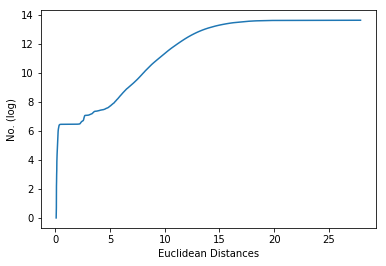

In [46]:
plt.plot(values, np.log(np.arange(1, 1 + len(values))))
plt.xlabel('Euclidean Distances')
plt.ylabel('No. (log)')

In [38]:
base = graph.fingerprints_df['Cc1cc2ccoc(=O)n2n1']
gephi_nodes = [gephi_graph.Node(x, d=ChemicalSpaceGraph.similarity(graph.fingerprints_df[x], base)) for x in graph.nodes]

In [41]:
show(6.5, 'colorful-');

7256
